In [1]:
import os
import pandas as pd
from src import utils
import plotly.io as pio
from plotly.io import show
import numpy as np

from dotenv import load_dotenv
load_dotenv()

import matplotlib.pyplot as plt

from skfolio import Population, RiskMeasure, Portfolio
from skfolio.model_selection import cross_val_predict, CombinatorialPurgedCV
from skfolio.optimization import (
    MeanRisk,
    ObjectiveFunction,
    EqualWeighted,
    InverseVolatility,
    RiskBudgeting
)

PORTFOLIO_PATH = os.getenv('PORTFOLIO_PATH')

# Fetch Data


In [2]:
tickers = []
with open(PORTFOLIO_PATH+'/custom.txt') as f:
    tickers = [s.strip() for s in f.readlines()]

tickers

['SANOFI',
 'JAIBALAJI',
 'INGERRAND',
 'PGHH',
 'GANESHHOUC',
 'SHARDAMOTR',
 'AKZOINDIA',
 'TANLA',
 'MGL',
 'MSTCLTD',
 'CHENNPETRO',
 'NIITLTD',
 'NEULANDLAB',
 'VSTIND',
 'VOLTAMP',
 'ECLERX',
 'SHAKTIPUMP',
 'ELECON',
 'SAFARI',
 'RAYMOND',
 'JAMNAAUTO',
 'BSOFT',
 'GPIL',
 'MANINFRA']

In [3]:
ret = utils.get_multiple_returns(tickers)
ret

Fetching data for JAIBALAJI: 5081 rows
Fetching data for INGERRAND: 5456 rows
Fetching data for PGHH: 5426 rows
Fetching data for GANESHHOUC: 4267 rows
Fetching data for SHARDAMOTR: 2168 rows
Fetching data for AKZOINDIA: 5456 rows
Fetching data for TANLA: 4304 rows
Fetching data for MGL: 1967 rows
Fetching data for MSTCLTD: 1291 rows
Fetching data for CHENNPETRO: 5456 rows
Fetching data for NIITLTD: 5588 rows
Fetching data for NEULANDLAB: 3866 rows
Fetching data for VSTIND: 5456 rows
Fetching data for VOLTAMP: 4376 rows
Fetching data for ECLERX: 4060 rows
Fetching data for SHAKTIPUMP: 3118 rows
Fetching data for ELECON: 4369 rows
Fetching data for SAFARI: 1182 rows
Fetching data for RAYMOND: 7151 rows
Fetching data for JAMNAAUTO: 3335 rows
Fetching data for BSOFT: 5460 rows
Fetching data for GPIL: 4480 rows
Fetching data for MANINFRA: 3525 rows


,SANOFI,JAIBALAJI,INGERRAND,PGHH,GANESHHOUC,SHARDAMOTR,AKZOINDIA,TANLA,MGL,MSTCLTD,...,VOLTAMP,ECLERX,SHAKTIPUMP,ELECON,SAFARI,RAYMOND,JAMNAAUTO,BSOFT,GPIL,MANINFRA
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-13,0.000531,0.048128,0.000749,0.020017,0.050272,0.002570,0.000353,-0.023789,0.008507,0.035867,...,0.016461,0.001389,-0.009035,-0.026667,-0.000801,-0.014164,-0.011703,0.027720,0.014706,-0.006772
2019-09-16,-0.007497,0.048469,-0.005409,0.005418,0.144890,-0.015281,0.002529,-0.018277,-0.007373,-0.032558,...,0.004038,0.135908,-0.015355,-0.006088,-0.004634,-0.018986,-0.034210,-0.035738,0.024457,0.004545
2019-09-17,-0.015506,0.048662,0.001088,-0.003525,-0.042938,-0.013487,0.001056,-0.037234,-0.010756,-0.033120,...,0.017883,-0.059823,-0.015594,-0.021439,0.006267,-0.010897,0.010899,-0.063636,-0.078102,-0.006787
2019-09-18,0.001683,0.039443,0.002507,0.011628,0.007084,-0.000845,-0.004600,0.013812,0.005286,0.016022,...,-0.001177,0.039357,0.042953,0.006260,0.008007,-0.007051,-0.004043,0.000747,-0.002238,-0.031891
2019-09-19,-0.023237,-0.049107,-0.000500,0.000034,-0.033998,-0.009509,0.006623,-0.021798,-0.009501,-0.054377,...,-0.004797,-0.034695,-0.026062,-0.010887,-0.013416,-0.006746,-0.041949,-0.003731,-0.064082,-0.044706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-19,0.001414,-0.014770,-0.000259,-0.010449,-0.050841,-0.006108,-0.010364,-0.012393,-0.017395,-0.024670,...,-0.006343,0.005445,0.049998,0.001653,-0.003609,-0.019853,-0.012359,0.010310,0.020066,-0.015871
2024-06-20,-0.037430,0.003960,0.016501,-0.013813,-0.015095,0.016788,0.036988,0.001324,0.041942,0.001581,...,-0.024852,-0.002980,0.049987,-0.000461,-0.012161,-0.013572,0.005824,-0.004198,-0.018996,0.022048
2024-06-21,-0.010604,0.016961,0.018272,-0.000662,-0.016249,-0.009011,0.014584,-0.004283,-0.012776,-0.003439,...,-0.004883,0.013220,0.049992,0.004877,0.034650,0.050752,0.010485,-0.009594,0.042078,0.011385


### Train test split

In [4]:
N = ret.shape[0]
ix = int(N * .9)

train_ret = ret.iloc[:ix]
test_ret = ret.iloc[ix:]
train_ret.shape, test_ret.shape

((1062, 24), (119, 24))

In [5]:
nse = utils.get_returns("^NSEI", index=True)
nse.index = nse["Date"]
nse = nse.drop(columns=["Date"]).loc[train_ret.index[0] :]
nse

,^NSEI
Date,
2019-09-13,0.008477
2019-09-16,-0.006537
2019-09-17,-0.016895
2019-09-18,0.002131
2019-09-19,-0.012532
...,...
2024-06-19,-0.001779
2024-06-20,0.002169
2024-06-21,-0.002796


# Models


### Sharpe Ratio Maximization


In [6]:
sharpe_model = MeanRisk(
    risk_measure=RiskMeasure.VARIANCE,
    objective_function=ObjectiveFunction.MAXIMIZE_RATIO,
    portfolio_params=dict(name="Max Sharpe"),
)
sharpe_model.fit(train_ret)
sharpe_pred = sharpe_model.predict(test_ret)
sharpe_pred.annualized_sharpe_ratio

2.247591056285716

### Minimum Variance


In [7]:
inv_var_model = InverseVolatility(portfolio_params=dict(name="Minimum Variance"))
inv_var_model.fit(train_ret)
inv_var_pred = inv_var_model.predict(test_ret)
inv_var_pred.annualized_sharpe_ratio

2.503457107205447

### Minimum CVaR

In [8]:
cvar_model = RiskBudgeting(risk_measure=RiskMeasure.CVAR, portfolio_params=dict(name="Minimum CVaR"))
cvar_model.fit(train_ret)
cvar_pred = cvar_model.predict(test_ret)
cvar_pred.annualized_sharpe_ratio

2.447087819057713

### NIFTY50 Benchmark


In [9]:
benchmark = EqualWeighted(portfolio_params=dict(name="NIFTY50"))
benchmark.fit(nse[:ix])
bench_pred = benchmark.predict(nse[ix:])
bench_pred.annualized_sharpe_ratio

1.2386497213779533

### Clustering Optimization


In [10]:
import skfolio.optimization as opt

inner_estimator = MeanRisk(
    objective_function=ObjectiveFunction.MAXIMIZE_RATIO,
    risk_measure=RiskMeasure.VARIANCE,
)
outer_estimator = opt.RiskBudgeting(risk_measure=RiskMeasure.CVAR)

cluster_model = opt.NestedClustersOptimization(
    inner_estimator=inner_estimator,
    outer_estimator=outer_estimator,
    n_jobs=-1,
    portfolio_params=dict(name="NCO-1"),
)
cluster_model.fit(train_ret)
cluster_pred = cluster_model.predict(test_ret)
cluster_pred.annualized_sharpe_ratio

2.651945607156596

### Rolling Window Optimization


In [11]:
#rolling_pred = utils.rolling_window_portfolio(ret, 5)

In [12]:
population = Population(
    [cluster_pred, sharpe_pred, inv_var_pred, cvar_pred,bench_pred]
)
population.set_portfolio_params(compounded=True)
population.plot_composition()

In [13]:
population.plot_cumulative_returns()

In [14]:
summary = population.summary()
summary#[summary.index.str.contains("Annualized")]

,NCO-1,Max Sharpe,Minimum Variance,Minimum CVaR,NIFTY50
Mean,0.27%,0.23%,0.22%,0.21%,0.077%
Annualized Mean,67.67%,58.25%,56.19%,53.76%,19.49%
Variance,0.026%,0.027%,0.020%,0.019%,0.0098%
Annualized Variance,6.51%,6.72%,5.04%,4.83%,2.48%
Semi-Variance,0.014%,0.015%,0.012%,0.012%,0.0058%
Annualized Semi-Variance,3.62%,3.88%,3.11%,2.98%,1.46%
Standard Deviation,1.61%,1.63%,1.41%,1.38%,0.99%
Annualized Standard Deviation,25.52%,25.91%,22.45%,21.97%,15.74%
Semi-Deviation,1.20%,1.24%,1.11%,1.09%,0.76%
Annualized Semi-Deviation,19.02%,19.71%,17.63%,17.27%,12.09%


In [15]:
population.composition() * 1_00_000

,NCO-1,Max Sharpe,Minimum Variance,Minimum CVaR,NIFTY50
asset,,,,,
INGERRAND,31239.947516,17317.689608,4855.331093,6413.775295,0.0
GPIL,8532.833768,3721.658859,3183.600456,2769.300053,0.0
SAFARI,8293.170223,10112.161229,4083.902134,4436.382970,0.0
VOLTAMP,6970.624893,5814.535251,4110.548300,4288.440577,0.0
JAIBALAJI,6825.855093,17228.817035,3295.183300,3262.189065,0.0
MANINFRA,5171.502330,2594.346780,3327.608816,2790.506683,0.0
TANLA,5001.023641,10099.586287,3239.148611,3088.295497,0.0
ECLERX,4989.764220,8536.596210,3776.532578,4062.950101,0.0
ELECON,4607.961109,8839.219778,2946.670172,2806.966487,0.0


In [16]:
comp = population.composition()
comp['Minimum CVaR']

asset
INGERRAND     0.064138
GPIL          0.027693
SAFARI        0.044364
VOLTAMP       0.042884
JAIBALAJI     0.032622
MANINFRA      0.027905
TANLA         0.030883
ECLERX        0.040630
ELECON        0.028070
NEULANDLAB    0.040159
BSOFT         0.028540
PGHH          0.097350
GANESHHOUC    0.032177
SHARDAMOTR    0.029161
MSTCLTD       0.028838
AKZOINDIA     0.059861
SANOFI        0.094695
VSTIND        0.067549
MGL           0.040933
JAMNAAUTO     0.033446
RAYMOND       0.027229
SHAKTIPUMP    0.028077
CHENNPETRO    0.026697
NIITLTD       0.026100
^NSEI         0.000000
Name: Minimum CVaR, dtype: float64

<Axes: >

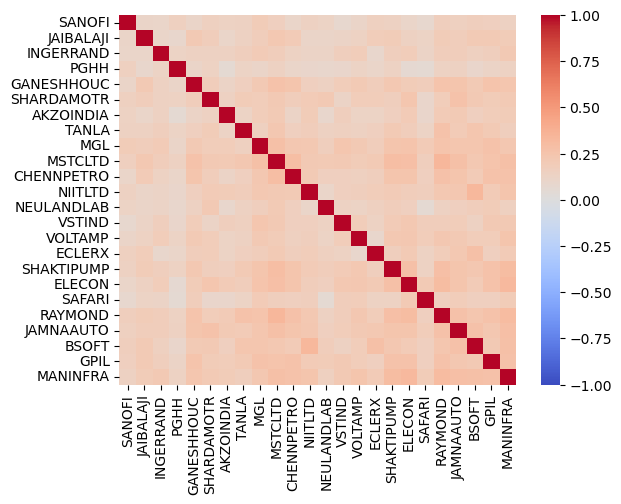

In [17]:
import seaborn as sns

sns.heatmap(ret.corr(method='spearman'), cmap='coolwarm', vmin=-1, vmax=1)

### SIP Analysis

In [22]:
utils.print_sip_info(monthly_amount=70_000, annual_rate=.7, months=12*5)

amount invested: ₹42,00,000.00
final amount: ₹2,13,59,075.65
amount gained: ₹1,71,59,075.65
CAGR: 408.55%
